In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("datasets/black_friday.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df['Age'].value_counts()


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [21]:
df['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<AxesSubplot:xlabel='Product_Category_3'>

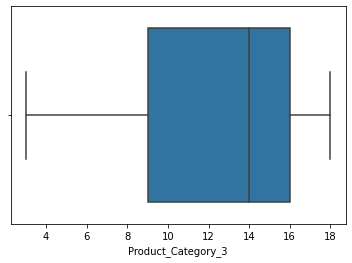

In [7]:
sns.boxplot(x='Product_Category_3',data=df)

In [8]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(),inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].mean(),inplace=True)


In [9]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [10]:
df=pd.get_dummies(df,columns=['Gender','Age','City_Category'],drop_first=True)
df

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,1000001,P00069042,10,2,0,3,9.842329,12.668243,8370,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,10,2,0,1,6.000000,14.000000,15200,0,0,0,0,0,0,0,0,0
2,1000001,P00087842,10,2,0,12,9.842329,12.668243,1422,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,10,2,0,12,14.000000,12.668243,1057,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,16,4+,0,8,9.842329,12.668243,7969,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,13,1,1,20,9.842329,12.668243,368,1,0,0,0,0,1,0,1,0
550064,1006035,P00375436,1,3,0,20,9.842329,12.668243,371,0,0,1,0,0,0,0,0,1
550065,1006036,P00375436,15,4+,1,20,9.842329,12.668243,137,0,0,1,0,0,0,0,1,0
550066,1006038,P00375436,1,2,0,20,9.842329,12.668243,365,0,0,0,0,0,0,1,0,1


In [11]:
df.drop('User_ID',axis=1 ,inplace=True)

In [12]:
df.drop('Product_ID',axis=1 ,inplace=True)

In [27]:
df.drop('Stay_In_Current_City_Years',axis=1 ,inplace=True)
df

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,10,0,3,9.842329,12.668243,8370,0,0,0,0,0,0,0,0,0
1,10,0,1,6.000000,14.000000,15200,0,0,0,0,0,0,0,0,0
2,10,0,12,9.842329,12.668243,1422,0,0,0,0,0,0,0,0,0
3,10,0,12,14.000000,12.668243,1057,0,0,0,0,0,0,0,0,0
4,16,0,8,9.842329,12.668243,7969,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,9.842329,12.668243,368,1,0,0,0,0,1,0,1,0
550064,1,0,20,9.842329,12.668243,371,0,0,1,0,0,0,0,0,1
550065,15,1,20,9.842329,12.668243,137,0,0,1,0,0,0,0,1,0
550066,1,0,20,9.842329,12.668243,365,0,0,0,0,0,0,1,0,1


In [28]:
x=df.drop('Purchase',axis=1)
y=df['Purchase']


In [29]:
x

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,10,0,3,9.842329,12.668243,0,0,0,0,0,0,0,0,0
1,10,0,1,6.000000,14.000000,0,0,0,0,0,0,0,0,0
2,10,0,12,9.842329,12.668243,0,0,0,0,0,0,0,0,0
3,10,0,12,14.000000,12.668243,0,0,0,0,0,0,0,0,0
4,16,0,8,9.842329,12.668243,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,9.842329,12.668243,1,0,0,0,0,1,0,1,0
550064,1,0,20,9.842329,12.668243,0,0,1,0,0,0,0,0,1
550065,15,1,20,9.842329,12.668243,0,0,1,0,0,0,0,1,0
550066,1,0,20,9.842329,12.668243,0,0,0,0,0,0,1,0,1


In [16]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
247757,16,0,5,11.000000,12.668243,1,0,1,0,0,0,0,1,0
335700,15,0,1,9.842329,12.668243,1,0,1,0,0,0,0,1,0
452009,4,0,1,8.000000,17.000000,1,1,0,0,0,0,0,1,0
28092,7,1,1,17.000000,12.668243,1,0,1,0,0,0,0,0,1
49362,0,0,3,4.000000,12.000000,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478090,0,0,1,8.000000,14.000000,1,0,1,0,0,0,0,1,0
445370,11,0,5,14.000000,12.668243,1,0,1,0,0,0,0,0,0
548331,11,0,19,9.842329,12.668243,1,0,1,0,0,0,0,0,1
410776,7,0,5,9.842329,12.668243,1,0,1,0,0,0,0,1,0


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [34]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[-1.05293037, -2.52822672, -1.39907951, ..., -1.24203337,
         1.52808064, -2.12356185],
       [-1.07640512, -2.52822672, -1.65739853, ..., -1.24203337,
         1.52808064, -2.12356185],
       [-1.3346273 , -2.52822672, -1.65739853, ..., -1.24203337,
         1.52808064, -2.12356185],
       ...,
       [-1.17030409, -2.52822672, -0.49496292, ..., -1.24203337,
        -2.57631658,  2.54249918],
       [-1.26420307, -2.52822672, -1.39907951, ..., -1.24203337,
         1.52808064, -2.12356185],
       [-1.38157678, -2.52822672, -1.59281878, ..., -1.24203337,
         1.52808064, -2.12356185]])

## 2

In [35]:
df=pd.read_csv("datasets/loan_data.csv")
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [37]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [38]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [39]:
df['purpose'].value_counts()


debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [40]:
df=pd.get_dummies(df,columns=['purpose'],drop_first=True)


In [41]:
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [42]:
x=df.drop('not.fully.paid',axis=1)
y=df['not.fully.paid']


In [43]:
x

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,1,0,0


In [44]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=33)
x_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
2119,1,0.1853,706.50,11.002100,13.88,662,1590.041667,0,0.0,1,0,0,0,1,0,0,0,0
8302,0,0.1387,119.41,10.126631,3.94,652,2202.000000,2728,48.7,3,0,0,0,1,0,0,0,0
4344,1,0.1392,648.61,11.350407,12.90,692,7140.958333,7541,82.0,2,0,0,0,1,0,0,0,0
8393,0,0.1324,676.20,11.512925,22.25,697,6456.041667,115602,29.7,5,0,0,0,1,0,0,0,0
521,1,0.1418,856.63,11.097410,22.45,707,2092.041667,25160,32.8,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1,0.1343,678.08,11.884489,10.15,682,4209.958333,41674,74.1,0,0,0,1,0,0,0,0,0
578,1,0.1103,98.26,11.236974,11.80,717,6589.000000,46427,98.4,0,0,0,0,0,0,1,0,0
5848,1,0.1287,161.44,10.257659,12.29,697,1950.041667,3647,93.5,1,0,0,0,1,0,0,0,0
2439,1,0.1253,312.08,11.350407,18.58,712,8970.041667,67614,49.2,0,0,0,0,0,0,0,0,1


In [46]:
y_train.value_counts()

0    6423
1    1239
Name: not.fully.paid, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)
y_train.value_counts()

0    6423
1    6423
Name: not.fully.paid, dtype: int64

In [49]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [50]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)